<a href="https://colab.research.google.com/github/carloslme/traffic-sign-classification/blob/main/traffic_sign_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODE TO CLASSIFY TRAFFIC SIGNS USING LE-NET ARCHITECTURE IN KERAS

# Problem


# Import libraries and dataset

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
# import libraries 
import pickle
import seaborn as sns
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [1]:
!wget "https://drive.google.com/uc?export=download&id=1fAvjyHg8uLf155K6MRRUa2FrpgDyAkF1" -O /tmp/train.p
!wget "https://drive.google.com/uc?export=download&id=1g8Pvst0sD7cM5FgwxglFGSxdTAXFuSs1" -O /tmp/test.p
!wget "https://drive.google.com/uc?export=download&id=1toQ0eOIGa3qPTBaXOWbsKrOet4StthdI" -O /tmp/valid.p

--2020-10-26 01:46:33--  https://drive.google.com/uc?export=download&id=1fAvjyHg8uLf155K6MRRUa2FrpgDyAkF1
Resolving drive.google.com (drive.google.com)... 74.125.143.102, 74.125.143.139, 74.125.143.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.143.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/tmp/train.p’

/tmp/train.p            [ <=>                ]   3.17K  --.-KB/s    in 0s      

2020-10-26 01:46:34 (36.6 MB/s) - ‘/tmp/train.p’ saved [3243]

--2020-10-26 01:46:34--  https://drive.google.com/uc?export=download&id=1g8Pvst0sD7cM5FgwxglFGSxdTAXFuSs1
Resolving drive.google.com (drive.google.com)... 74.125.143.102, 74.125.143.139, 74.125.143.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.143.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-5c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jkgm

In [6]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("/content/drive/My Drive/Colab Notebooks/traffic_sigh_classification/traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/tmp/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/tmp/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [9]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [10]:
X_train.shape

(34799, 32, 32, 3)

In [11]:
y_train.shape

(34799,)

# Image Exploration

36

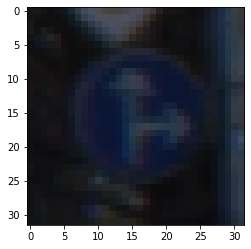

In [12]:
i = 1001
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

# Data Preparation

In [13]:
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [14]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [15]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128


In [16]:
X_train_gray.shape

(34799, 32, 32, 1)

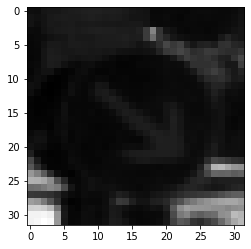

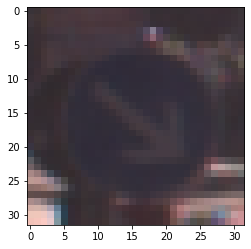

In [18]:
i = 611
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])

# Model training
The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [ ]:
# Import train_test_split from scikit library

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models

import tensorflow as tf

from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

In [40]:
init = "glorot_uniform"
reg = l2(0.0005) # L2 regularization to detect signs of overfitting

cnn_model = Sequential(
    [
     layers.Conv2D(filters=2, kernel_size=5, padding='same', kernel_initializer=init, kernel_regularizer=reg, activation='relu', input_shape=(32,32,1)),
     layers.Dropout(0.25),
     layers.MaxPooling2D(),
     layers.Conv2D(filters=16, kernel_size=5, padding='same', kernel_initializer=init, kernel_regularizer=reg, activation='relu'),
     layers.Dropout(0.25),
     layers.MaxPooling2D(),
     layers.Conv2D(filters=32, kernel_size=5, padding='same', kernel_initializer=init, kernel_regularizer=reg, activation='relu'),
     layers.Dropout(0.25),
     layers.MaxPooling2D(),
     layers.Flatten(),
     layers.Dense(120, activation='relu'),
     layers.Dropout(0.25),
     layers.Dense(84, activation='relu'),
     layers.Dropout(0.5),
     layers.Dense(43, activation='softmax'),
    ]
)

In [41]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 2)         52        
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 2)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 2)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 16)        816       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 32)         

In [42]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=20,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/20
70/70 [==============================] - 31s 450ms/step - loss: 0.3814 - accuracy: 0.9049 - val_loss: 0.4797 - val_accuracy: 0.8823
Epoch 2/20
70/70 [==============================] - 31s 447ms/step - loss: 0.3681 - accuracy: 0.9101 - val_loss: 0.4742 - val_accuracy: 0.8828
Epoch 3/20
70/70 [==============================] - 31s 449ms/step - loss: 0.3545 - accuracy: 0.9124 - val_loss: 0.4592 - val_accuracy: 0.8898
Epoch 4/20
70/70 [==============================] - 32s 451ms/step - loss: 0.3407 - accuracy: 0.9176 - val_loss: 0.4523 - val_accuracy: 0.8882
Epoch 5/20
70/70 [==============================] - 32s 462ms/step - loss: 0.3433 - accuracy: 0.9154 - val_loss: 0.4700 - val_accuracy: 0.8812
Epoch 6/20
70/70 [==============================] - 32s 450ms/step - loss: 0.3415 - accuracy: 0.9170 - val_loss: 0.4569 - val_accuracy: 0.8855
Epoch 7/20
70/70 [==============================] - 31s 447ms/step - loss: 0.3335 - accuracy: 0.9184 - val_loss: 0.4555 - val_accuracy: 0.8880

# Model evaluation

In [48]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.9034


In [49]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

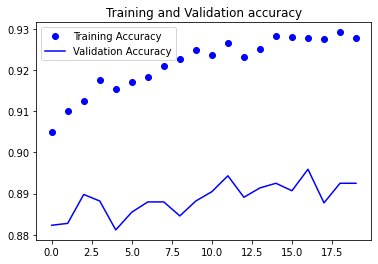

In [50]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


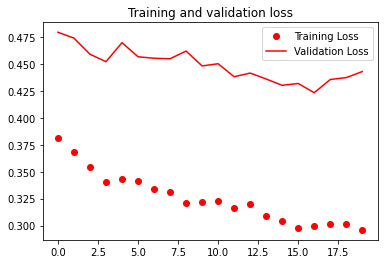

In [51]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [52]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test

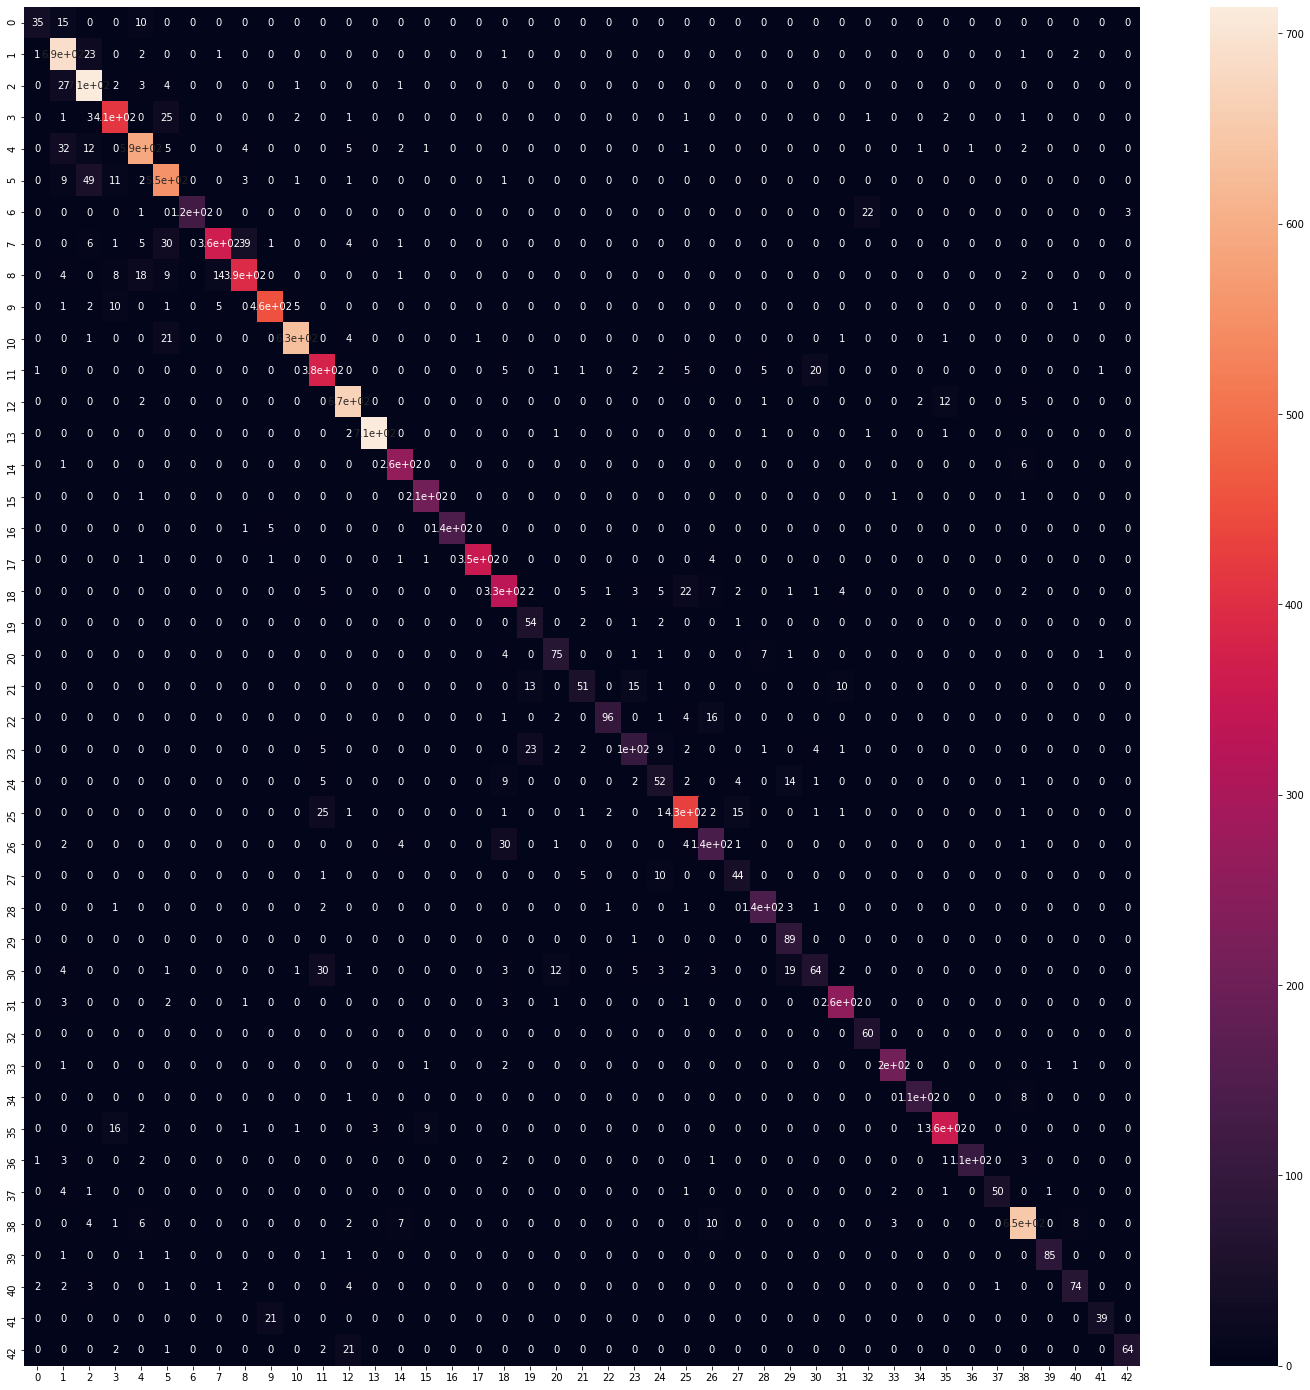

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

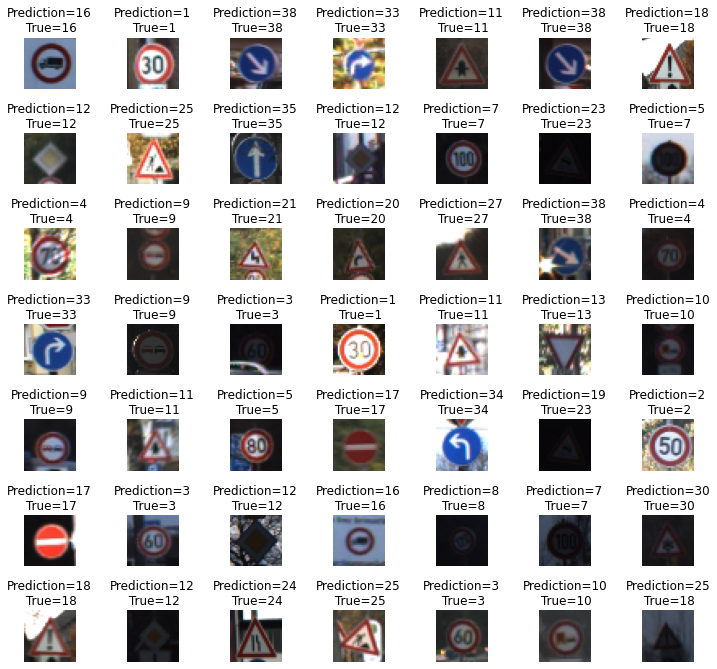

In [54]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)